---
layout: page
title: Retirement Burndown
---

## How much do I need to retire?

There are two primary components:

- How much are my annual expenses?
- How many years of retirement?

In [6]:
import sys
sys.path.insert(0, '../src')
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from IPython.display import display, Markdown

This data model is based on annual retirement expense data from the [Association of Superannuation Funds of Australia](retirement-planning.md). Expenses are plotted for different 'lifestyle' scenarios:

In [7]:
""" Chart variables """
# annual expenses source retirement-planning.md
# this is also simplified - expenses typically reduce after age 85 when most people have a less active lifestyle.
annual_expenses = {
    "modest": {
        "expenses": 45000,
        "color": "red",
    },
    "comfortable": {
        "expenses": 70000,
        "color": "orange",
    },
    "four-star": {
        "expenses": 90000,
        "color": "green",
    },
    "luxury": {
        "expenses": 140000,
        "color": "blue",
    },
    "opulent": {
        "expenses": 230000,
        "color": "darkviolet",
    },
}

# Create a Markdown table
table = "| Lifestyle | " + " | ".join(key.capitalize() for key in annual_expenses.keys()) + " |\n"
table += "|-----------|" + "|".join("--:" for _ in annual_expenses.keys()) + "|\n"
table += "| Expenses  | " + "| ".join("${:,}".format(value['expenses']) for value in annual_expenses.values()) + " |"

# Display the table
display(Markdown(table))

| Lifestyle | Modest | Comfortable | Four-star | Luxury | Opulent |
|-----------|--:|--:|--:|--:|--:|
| Expenses  | $45,000| $70,000| $90,000| $140,000| $230,000 |

In [8]:
life_expectancy = 100
retirement_age = 50 
retirement_years = life_expectancy - retirement_age +1 # add 1 to include year of retirement in range

display(Markdown(f"""
The chart below shows the retirement fund required for up to {retirement_years - 1} years of retirement:
"""))


The chart below shows the retirement fund required for up to 50 years of retirement:


In [9]:
""" Data manipulation """

# Create a DataFrame with number of rows = retirement_years
df = pd.DataFrame(index=range(retirement_years))

for i in range(retirement_years):
    df['year'] = retirement_years - df.index -1
    df['age'] = life_expectancy - df.index

# For each key in annual_expenses, create a column
for lifestyle, details in annual_expenses.items():
    # Each year the values increase by the related annual_expenses value
    df[lifestyle.capitalize()] = [i * details['expenses'] for i in range(retirement_years)]



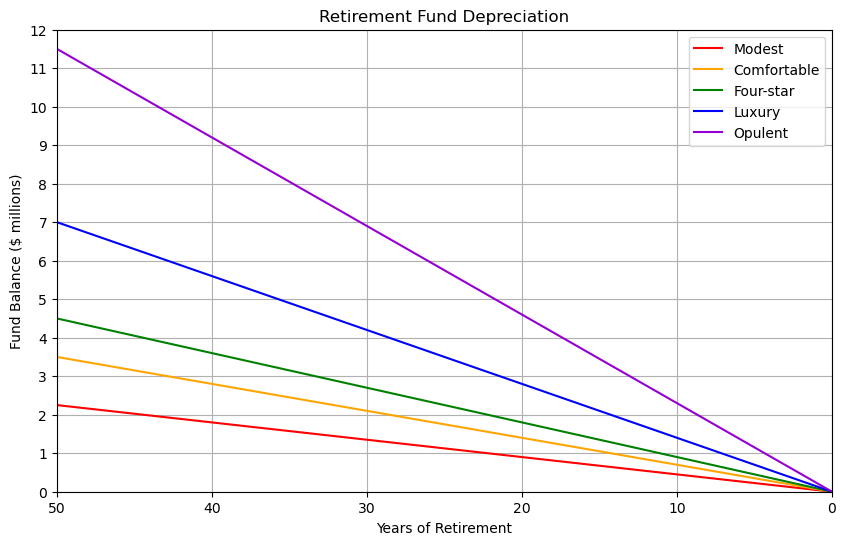

In [10]:
""" Basic chart """
# create a new dataframe with only the annual_expense columns
df_burndown = df[list(key.capitalize() for key in annual_expenses.keys())]

# create a list of colors for each lifestyle
colors = [details['color'] for details in annual_expenses.values()]

# plot the dataframe with the specified colors
df_burndown.plot(figsize=(10, 6), color=colors)

# reverse the x-axis to burndown instead of burnup
ax = plt.gca()
ax.invert_xaxis()
plt.xlabel('Years of Retirement')
plt.ylabel('Fund Balance ($ millions)')
plt.title('Retirement Fund Depreciation')
plt.grid(True)
plt.xlim([retirement_years-1, 0])
plt.ylim(ymin=0, ymax=12e6)

# Format y-axis ticks every 1 million
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1e6))
# with labels formatted in millions with no decimal places
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x*1e-6)))

plt.show()

This model excludes inflation, the true funds required would be much higher as expenses will increase over time.

This model also assumes a cash fund that excludes interest, yield or appreciation. The funds required would be much less if the fund earnt or accrued value over time.